In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

folder = 'achteck-new2-part1/'
img_path = folder + "view_0000-undist-L2.png"



In [3]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()

NameError: name 'img' is not defined

Read Redwood dataset
<class 'open3d.cpu.pybind.data.SampleRedwoodRGBDImages'>
['/home/arthur/open3d_data/extract/SampleRedwoodRGBDImages/color/00000.jpg', '/home/arthur/open3d_data/extract/SampleRedwoodRGBDImages/color/00001.jpg', '/home/arthur/open3d_data/extract/SampleRedwoodRGBDImages/color/00002.jpg', '/home/arthur/open3d_data/extract/SampleRedwoodRGBDImages/color/00003.jpg', '/home/arthur/open3d_data/extract/SampleRedwoodRGBDImages/color/00004.jpg']
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


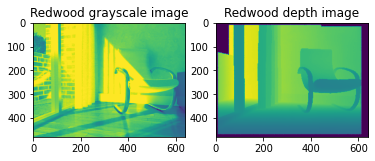

In [13]:
import open3d as o3d
print("Read Redwood dataset")
redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
print(type(redwood_rgbd))
print(redwood_rgbd.color_paths)

color_raw = o3d.io.read_image(redwood_rgbd.color_paths[0])
depth_raw = o3d.io.read_image(redwood_rgbd.depth_paths[0])
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

###############################

plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

############################333

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])#, zoom=0.5)

In [9]:
def read_pfm_file(file):
    file = open(file, 'rb')

    color = None
    width = None
    height = None
    scale = None
    endian = None

    header = file.readline().rstrip()
    if header.decode("ascii") == 'PF':
        color = True
    elif header.decode("ascii") == 'Pf':
        color = False
    else:
        raise Exception('Not a PFM file.')

    dim_match = re.match(r'^(\d+)\s(\d+)\s$', file.readline().decode("ascii"))
    if dim_match:
        width, height = list(map(int, dim_match.groups()))
    else:
        raise Exception('Malformed PFM header.')

    scale = float(file.readline().decode("ascii").rstrip())
    if scale < 0:  # little-endian
        endian = '<'
        scale = -scale
    else:
        endian = '>'  # big-endian

    data = np.fromfile(file, endian + 'f')
    shape = (height, width, 3) if color else (height, width)

    data = np.reshape(data, shape)
    data = np.flipud(data)
    return data  #, scale 


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

view_0000-depth-L2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
RGBDImage of size 
Color image : 1296x864, with 1 channels.
Depth image : 1296x864, with 1 channels.
Use numpy.asarray to access buffer data.


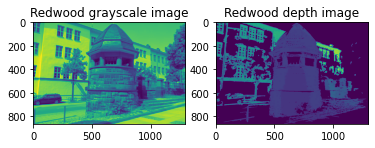

In [14]:
import open3d as o3d
import cv2
import numpy as np
from matplotlib import pyplot as plt
import re
from PIL import Image

folder = 'achteck-new2-part1/'
img_path = folder + "view_0000-undist-L2.png"
# print("Read Redwood dataset")
# redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
# print(type(redwood_rgbd))
# print(redwood_rgbd.color_paths)
# print(redwood_rgbd.depth_paths)

####################
# array_image = read_pfm_file(folder + "view_0000-depth-L2.pfm")
# print(array_image)

# im2 = Image.open(folder + "view_0000-depth-L2.pfm")
# im2.show()

# im = Image.fromarray(array_image)
# im.save(folder + "view_0000-depth-L2.jpg")

for i in range(1):
    base_depth_name = 'view_000%d-depth-L2' % i
    base_undist_name = 'view_000%d-undist-L2' % i

    print(base_depth_name)
    pfm_image = cv2.imread(folder + base_depth_name + ".pfm")
    print(pfm_image)
    print(type(pfm_image))
    # print(dir(pfm_image))
    # print(pfm_image.argmax())

    #cv2.imwrite(folder + base_depth_name + ".jpg", pfm_image)
    depth_as_img = o3d.geometry.Image((pfm_image).astype(np.uint8))


    color_raw = o3d.io.read_image(folder + base_undist_name + ".png")
    depth_raw = depth_as_img
    #o3d.io.read_image(folder + base_depth_name + ".jpg")
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        color_raw, depth_raw)
    print(rgbd_image)

    ###############################

    plt.subplot(1, 2, 1)
    plt.title('Redwood grayscale image')
    plt.imshow(rgbd_image.color)
    plt.subplot(1, 2, 2)
    plt.title('Redwood depth image')
    plt.imshow(rgbd_image.depth)
    plt.show()

    ############################333

    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
        rgbd_image,
        o3d.camera.PinholeCameraIntrinsic(
            o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
    # Flip it, otherwise the pointcloud will be upside down
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([pcd])#, zoom=0.5)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


True

In [ ]:
print("Read SUN dataset")
sun_rgbd = o3d.data.SampleSUNRGBDImage()
color_raw = o3d.io.read_image(sun_rgbd.color_path)
depth_raw = o3d.io.read_image(sun_rgbd.depth_path)
rgbd_image = o3d.geometry.RGBDImage.create_from_sun_format(color_raw, depth_raw)
print(rgbd_image)

Read SUN dataset
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/SampleSUNRGBDImage.zip
[Open3D INFO] Downloaded to /home/arthur/open3d_data/download/SampleSUNRGBDImage/SampleSUNRGBDImage.zip
[Open3D INFO] Extracting /home/arthur/open3d_data/download/SampleSUNRGBDImage/SampleSUNRGBDImage.zip.
[Open3D INFO] Extracted to /home/arthur/open3d_data/extract/SampleSUNRGBDImage.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


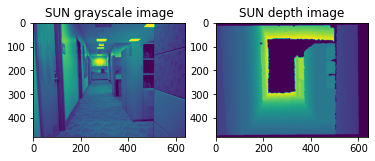

In [ ]:
plt.subplot(1, 2, 1)
plt.title('SUN grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('SUN depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])#, zoom=0.5)

In [ ]:
import matplotlib.image as mpimg
import re


# This is special function used for reading NYU pgm format
# as it is written in big endian byte order.
def read_nyu_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    img = np.frombuffer(buffer,
                        dtype=byteorder + 'u2',
                        count=int(width) * int(height),
                        offset=len(header)).reshape((int(height), int(width)))
    img_out = img.astype('u2')
    return img_out


print("Read NYU dataset")
# Open3D does not support ppm/pgm file yet. Not using o3d.io.read_image here.
# MathplotImage having some ISSUE with NYU pgm file. Not using imread for pgm.
nyu_rgbd = o3d.data.SampleNYURGBDImage()
color_raw = mpimg.imread(nyu_rgbd.color_path)
depth_raw = read_nyu_pgm(nyu_rgbd.depth_path)
color = o3d.geometry.Image(color_raw)
depth = o3d.geometry.Image(depth_raw)
rgbd_image = o3d.geometry.RGBDImage.create_from_nyu_format(color, depth)
print(rgbd_image)

Read NYU dataset
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/SampleNYURGBDImage.zip
[Open3D INFO] Downloaded to /home/arthur/open3d_data/download/SampleNYURGBDImage/SampleNYURGBDImage.zip
[Open3D INFO] Extracting /home/arthur/open3d_data/download/SampleNYURGBDImage/SampleNYURGBDImage.zip.
[Open3D INFO] Extracted to /home/arthur/open3d_data/extract/SampleNYURGBDImage.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


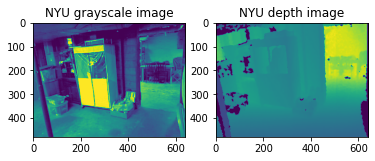

In [ ]:
plt.subplot(1, 2, 1)
plt.title('NYU grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('NYU depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])#, zoom=0.5)